In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
#!pip install sklearn-xarray




In [3]:
DataSet = xr.open_dataset("/content/drive/MyDrive/BTTAI_Project_Team_B/data_set_files/final_merged_dataset.nc")
DataSet

<xarray.Dataset>
Dimensions:        (lon: 600, lat: 258, year: 95)
Coordinates:
  * lon            (lon) float64 -171.9 -171.6 -171.4 ... -22.62 -22.38 -22.12
  * lat            (lat) float64 12.12 12.38 12.62 12.88 ... 75.88 76.12 76.38
  * year           (year) int32 2006 2007 2008 2009 2010 ... 2097 2098 2099 2100
Data variables:
    null_variable  (lat, lon, year) object ...
    maxHuss        (year, lat, lon) float32 ...
    maxPrec        (year, lat, lon) float32 ...
    maxTemp        (year, lat, lon) float32 ...
    meanHuss       (year, lat, lon) float32 ...
    meanPrec       (year, lat, lon) float32 ...
    meanRsds       (year, lat, lon) float32 ...
    meanTemp       (year, lat, lon) float32 ...
    minHuss        (year, lat, lon) float32 ...
    minPrec        (year, lat, lon) float32 ...
    minTemp        (year, lat, lon) float32 ...

In [4]:
'''
DataSet = xr.open_dataset("/content/drive/MyDrive/BTTAI_Project_Team_B/data_set_files/final_merged_dataset.nc")
subset_da = DataSet.sel(lat=slice(24.396308, 49.384358), lon=slice(-124.848974, -66.885444),year=slice(2006,2023))
df = subset_da.to_dataframe()
df.reset_index(inplace=True)
df.dropna(subset=['maxHuss'], inplace=True)
df = df.replace(to_replace='', value=np.nan)
df = df.dropna(subset='null_variable')
df['wns'] = df['null_variable'].map(lambda x: 1 if x == 'W' else 0)
df.drop('null_variable', axis=1, inplace=True)
df

'''

subset_da = DataSet.sel(lat=slice(24.396308, 49.384358), lon=slice(-124.848974, -66.885444),year=slice(2006,2023))
df = subset_da.to_dataframe()
df.reset_index(inplace=True)
df.dropna(subset=['maxHuss'], inplace=True)
df = df.replace(to_replace='', value=np.nan)
#df = df.dropna(subset='null_variable')


df['wns'] = df['null_variable'].map(lambda x: 1 if x == 'W' else 0)

# Select instances where the label is 0
zero_label_indices = df[df['wns'] == 0].index

# Randomly select a subset of instances with label 0
# For example, let's select 30% of instances with label 0
subset_size = int(0.998 * len(zero_label_indices))
random_subset_indices = np.random.choice(zero_label_indices, size=subset_size, replace=False)

# Update the data by keeping only the randomly selected instances
selected_data = df.drop(random_subset_indices)


# Update the data by keeping only the randomly selected instances
selected_data.drop('null_variable', axis=1, inplace=True)
df = selected_data
df

,lon,lat,year,maxHuss,maxPrec,maxTemp,meanHuss,meanPrec,meanRsds,meanTemp,minHuss,minPrec,minTemp,wns
7029,-123.875,47.125,2015,0.010316,77.062485,29.391571,0.006102,7.129748,136.466080,9.887991,0.001677,0.0,-4.412201,0
7072,-123.875,47.625,2022,0.010350,104.144897,28.538910,0.005986,9.779957,137.084778,8.628778,0.002234,0.0,-8.909180,0
8619,-123.625,44.125,2021,0.011276,72.522957,30.721863,0.005811,5.802934,153.772308,10.819865,0.002591,0.0,-7.023712,0
8872,-123.625,47.625,2022,0.010778,102.644287,29.025055,0.005777,9.181305,141.962585,7.963105,0.001768,0.0,-9.206238,1
10180,-123.375,40.875,2016,0.013484,72.380173,28.020172,0.005323,5.111522,160.960129,10.394512,0.001742,0.0,-3.446594,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410226,-67.875,47.125,2012,0.015380,49.953457,28.116577,0.004637,3.358159,158.839706,5.162429,0.000267,0.0,-21.423599,0
412088,-67.625,47.875,2020,0.015477,53.101692,29.035706,0.004538,3.767441,154.608612,4.643592,0.000274,0.0,-24.424606,0
413646,-67.375,44.625,2012,0.011994,73.799866,25.687622,0.005196,3.912584,163.111237,10.625462,0.000522,0.0,-14.548401,0
415650,-67.125,47.375,2018,0.013311,43.013538,26.177856,0.004747,3.180260,162.539764,5.031478,0.000271,0.0,-20.376648,0


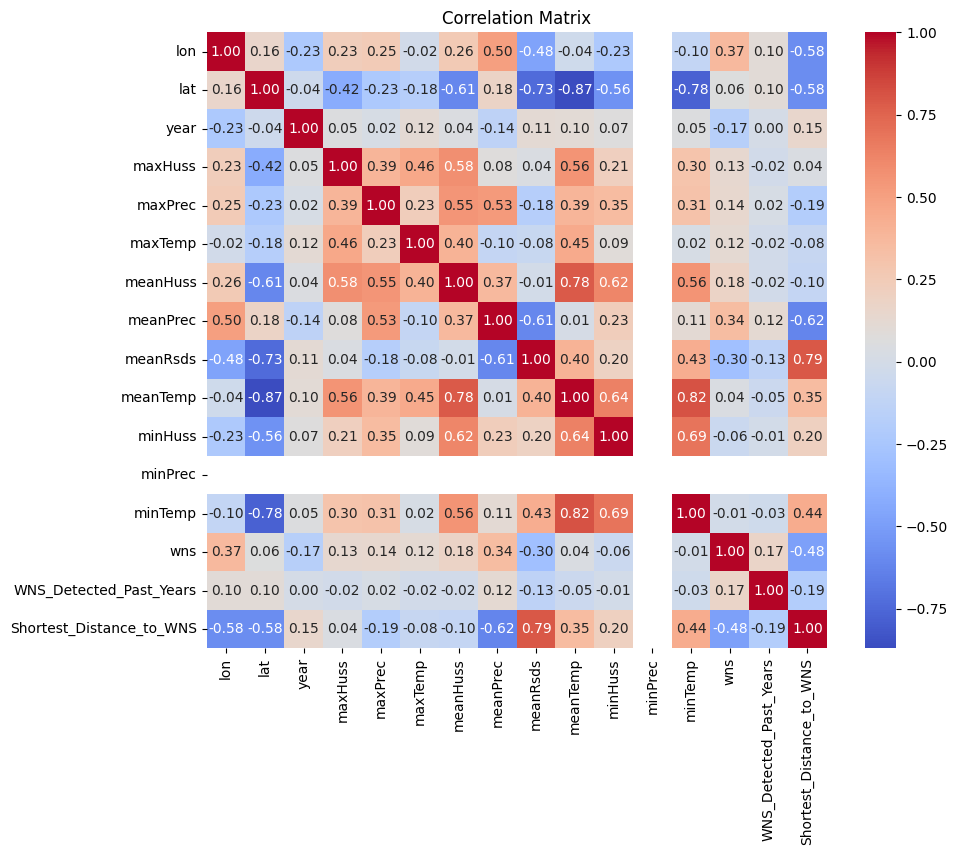

In [20]:
# Creating a DataFrame


# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

split data

In [28]:
# get label
label = 'wns'
y = df["wns"]
X = df.drop("wns", axis=1)

# split data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.10, random_state=1234)

# Split the data into training and testing sets based on the cutoff year
cutoff_year = 2020

X_train = X[df['year'] < cutoff_year]
y_train = y[df['year'] < cutoff_year]
X_test = X[df['year'] >= cutoff_year]
y_test = y[df['year'] >= cutoff_year]

# Normalize the features using Min-Max scaling (fit on training data and transform both training and testing data)
#scaler = MinMaxScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(class_weight='balanced',
                                       criterion = 'entropy',
                                       max_depth = None,
                                       max_leaf_nodes = 20,
                                       min_samples_leaf = 1,
                                       min_samples_split = 2,
                                       random_state=42)

# Fit the model to the training data
#dt_classifier.fit(X_train_scaled, y_train)
dt_classifier.fit(X_train,y_train)

# Make predictions on the test data
#y_pred = dt_classifier.predict(X_test_scaled)
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_report_result)

Accuracy: 0.7233
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       129
           1       0.23      0.20      0.21        30

    accuracy                           0.72       159
   macro avg       0.53      0.52      0.52       159
weighted avg       0.71      0.72      0.72       159




Feature Importance:
lon                         0.032533
lat                         0.055525
year                        0.111289
maxHuss                     0.000000
maxPrec                     0.000000
maxTemp                     0.035530
meanHuss                    0.096639
meanPrec                    0.072568
meanRsds                    0.000000
meanTemp                    0.000000
minHuss                     0.045545
minPrec                     0.000000
minTemp                     0.000000
WNS_Detected_Past_Years     0.000000
Shortest_Distance_to_WNS    0.550371
dtype: float64


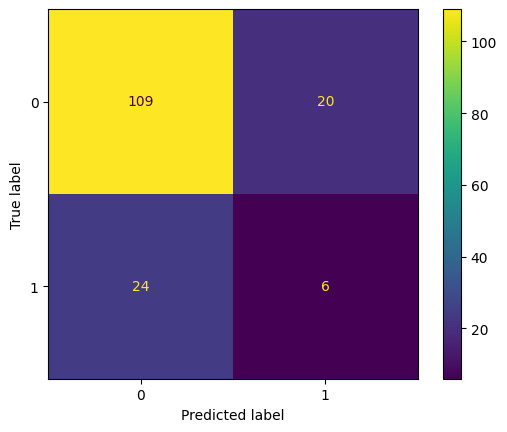

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

# Feature Importance
feature_importance = pd.Series(dt_classifier.feature_importances_, index=X.columns)
print("\nFeature Importance:")
print(feature_importance)

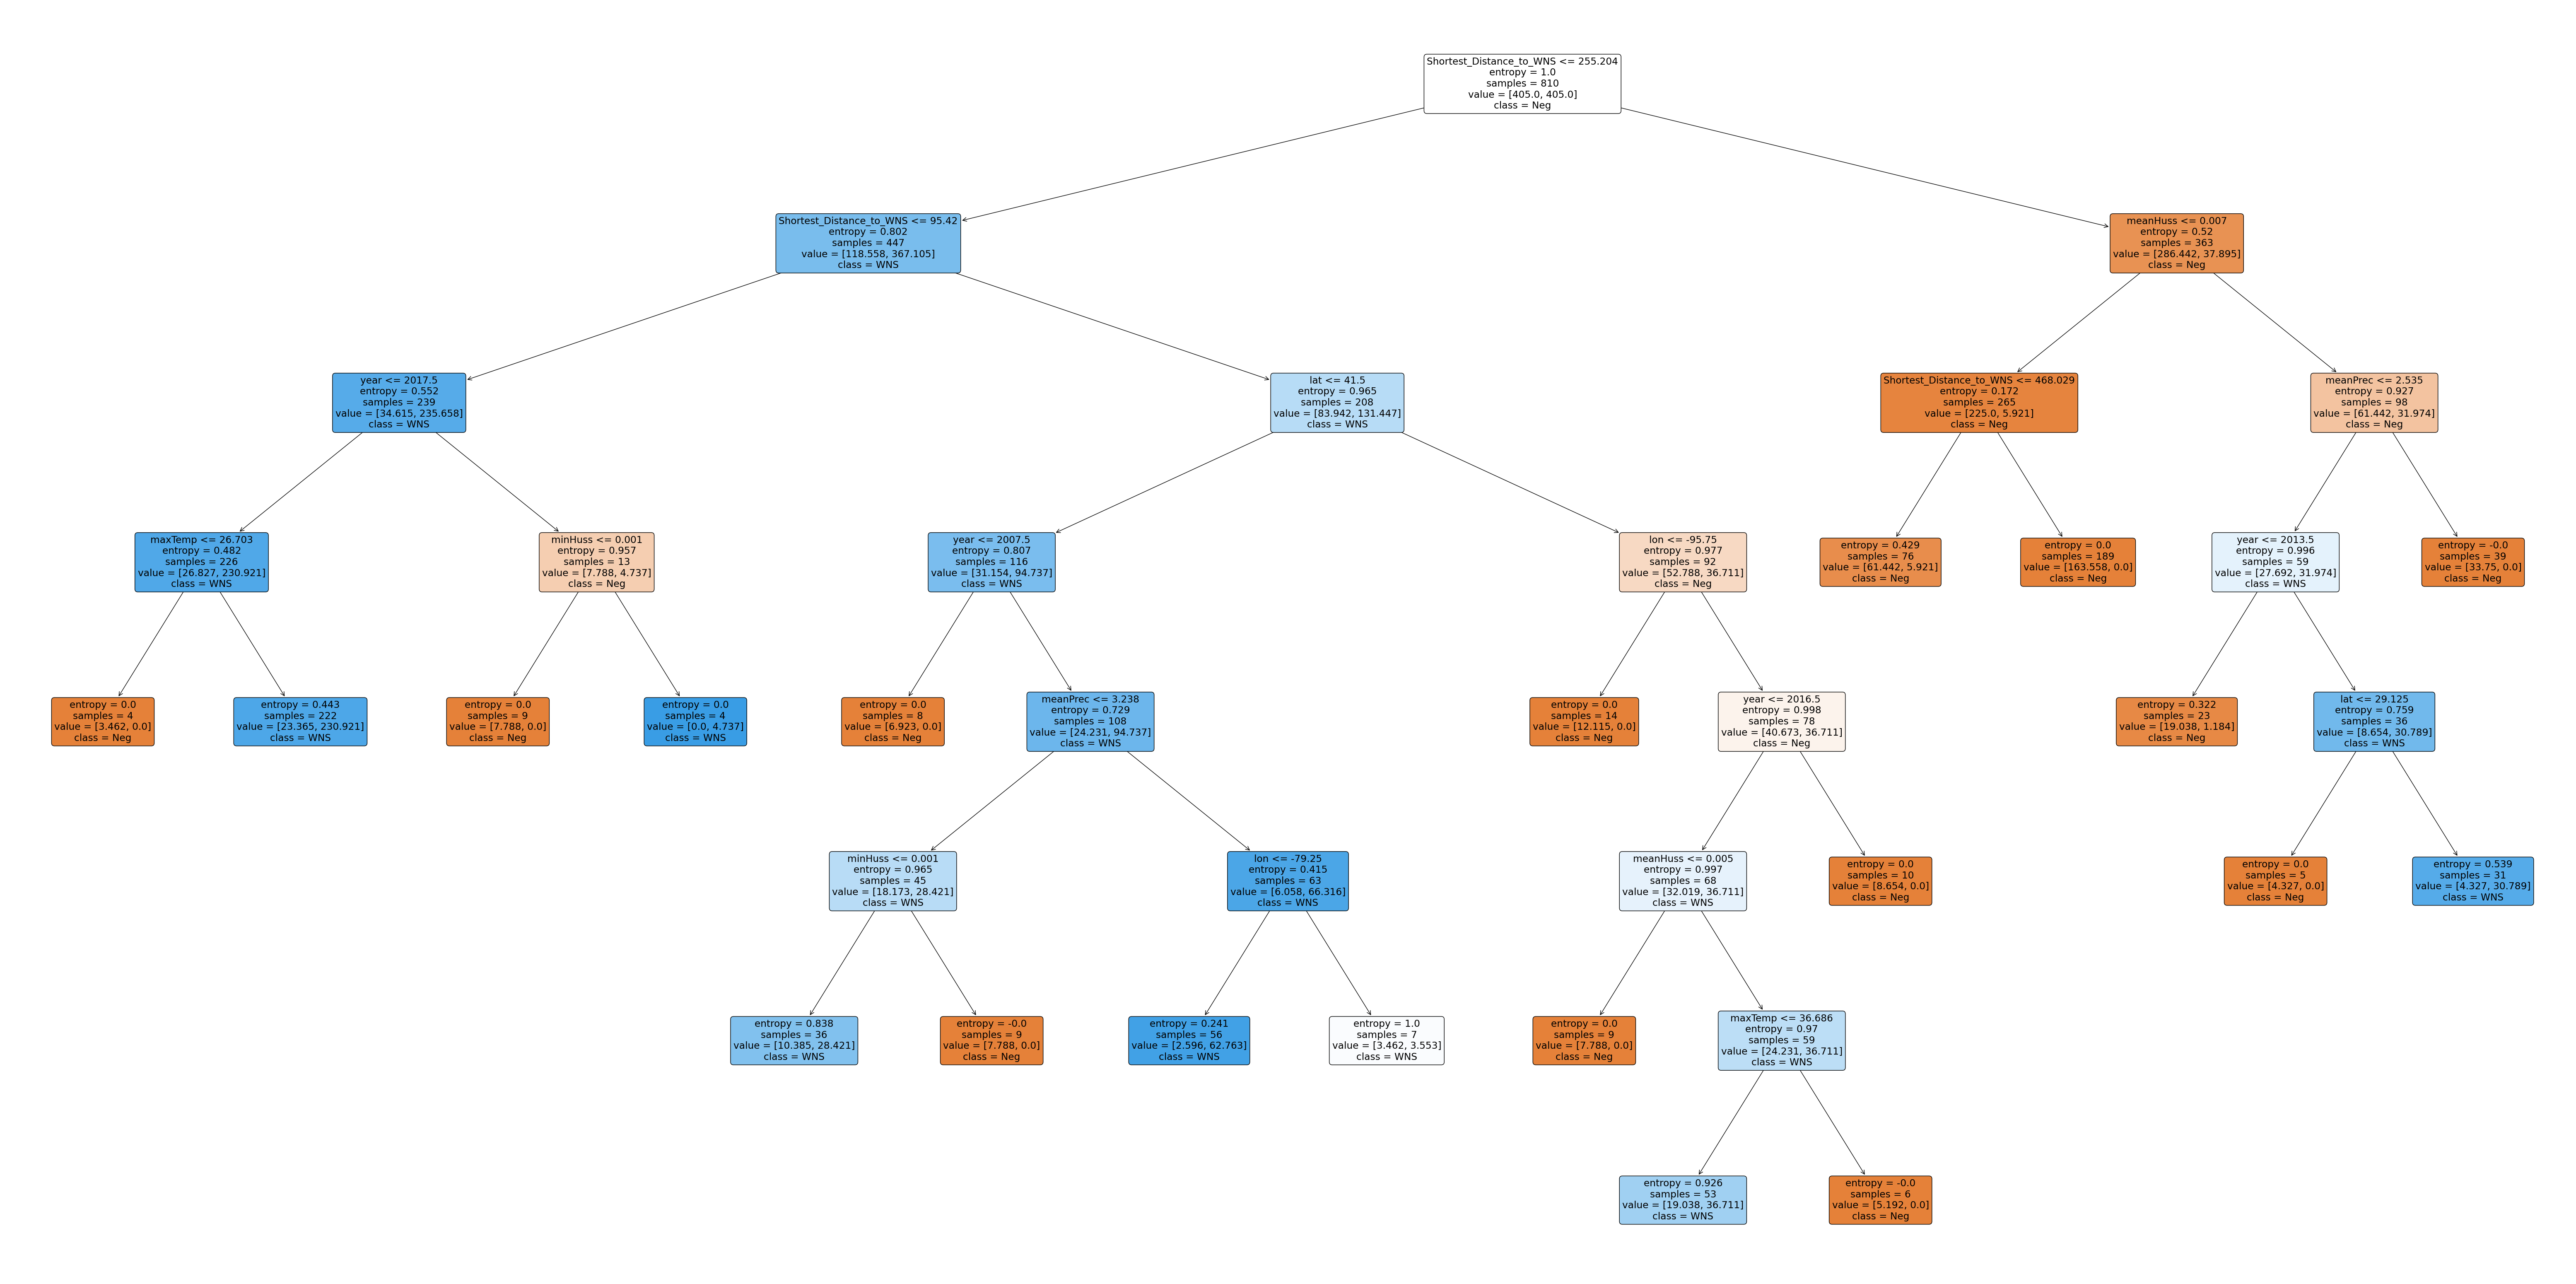

In [44]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming clf is your trained decision tree classifier
# Replace 'clf' with your actual classifier variable name

plt.figure(figsize=(80, 40))  # Set the figure size
# Increase text size for node labels and other text elements
plt.rc('font', size=30)  # Set font size for text elements

# Visualize the decision tree using plot_tree
plot_tree(dt_classifier, filled=True, rounded=True, class_names=['Neg', 'WNS'], feature_names=X.columns)
plt.show()

hyperparameter selection

In [22]:
#hyperparameter selection(Unit 5):
from sklearn.model_selection import validation_curve

from sklearn.model_selection import GridSearchCV


# Define the parameter grid to search through
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 5, 10, 20, 25, 30],
    'splitter': ['best', 'random'],
    'class_weight':['balanced'],
    'random_state': [42]
}
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)

Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
Best Accuracy: 0.7821216815341061


Implement Single Decision Tree Classifier



In [8]:
print("Begin Single Decision Tree Classifier")
#add best params from previous hyperparameter selection
model = DecisionTreeClassifier(criterion= 'entropy', max_depth = None, max_leaf_nodes = 20, min_samples_leaf = 1, min_samples_split = 10, random_state = 42, splitter = 'random', class_weight='balanced')
model.fit(X_train, y_train)
class_label_predictions = model.predict(X_test)
acc_score = accuracy_score(class_label_predictions, y_test)
print(acc_score)

Begin Single Decision Tree Classifier
0.7232704402515723


Implement Random Forest


* ** How to do hyperparameter optimization??**



In [9]:
#implement random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

print('Begin Random Forest Implementation...')
rf_20_model = RandomForestClassifier(criterion='entropy', n_estimators=20)
rf_20_model.fit(X_train, y_train)
rf_20_predictions = list(rf_20_model.predict_proba(X_test)[:,1])

rf_100_model = RandomForestClassifier(criterion='entropy', n_estimators=100)
rf_100_model.fit(X_train, y_train)
rf_100_predictions = list(rf_100_model.predict_proba(X_test)[:,1])

Begin Random Forest Implementation...


Evaluate Random Forest w/ ROC and AUC

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'df' is your DataFrame containing spatiotemporal data
# X contains your features, y contains the target variable ('WNS')
# Modify this based on your actual column names
X = df[['lon', 'lat', 'year', 'maxHuss', 'maxPrec', 'maxTemp', 'meanHuss', 'meanPrec', 'meanRsds', 'meanTemp', 'minHuss', 'minTemp']]
y = df['wns']

# Split the data into training and test sets (maintaining temporal order if required)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the data into training and testing sets based on the cutoff year
cutoff_year = 2020

X_train = X[df['year'] < cutoff_year]
y_train = y[df['year'] < cutoff_year]
X_test = X[df['year'] >= cutoff_year]
y_test = y[df['year'] >= cutoff_year]

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
feature_importance = pd.Series(rf_classifier.feature_importances_, index=X.columns)
print("\nFeature Importance:")
print(feature_importance)

Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       129
           1       0.22      0.07      0.10        30

    accuracy                           0.78       159
   macro avg       0.52      0.51      0.49       159
weighted avg       0.70      0.78      0.73       159


Feature Importance:
lon         0.171330
lat         0.066915
year        0.100833
maxHuss     0.067806
maxPrec     0.048645
maxTemp     0.047171
meanHuss    0.086857
meanPrec    0.116632
meanRsds    0.080843
meanTemp    0.091597
minHuss     0.052640
minTemp     0.068731
dtype: float64


In [11]:



# Sort DataFrame by Year in ascending order
df = df.sort_values(by='year')

# Function to check if WNS was detected in previous years for a specific coordinate
def wns_detected_past_years(row):
    past_years_data = df[(df['lat'] == row['lat']) & (df['lon'] == row['lon']) & (df['year'] < row['year'])]
    if len(past_years_data) > 0 and (past_years_data['wns'] == 1).any():
        return 1  # WNS detected in past years for this coordinate
    else:
        return 0  # WNS not detected in past years for this coordinate

# Apply the function to create a new column 'WNS_Detected_Past_Years'
df['WNS_Detected_Past_Years'] = df.apply(wns_detected_past_years, axis=1)



In [12]:
# Function to calculate distance between two coordinates using Haversine formula
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in kilometers
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

# Function to calculate shortest distance for each point to a coordinate with previous WNS detection
def shortest_distance_to_wns(row):
    wns_detected_coords = df[(df['WNS_Detected_Past_Years'] == 1)]
    distances = [haversine(row['lat'], row['lon'], lat, lon) for lat, lon in wns_detected_coords[['lat', 'lon']].values]
    if len(distances) > 0:
        return min(distances)
    else:
        return None

# Apply the function to create a new column 'Shortest_Distance_to_WNS'
df['Shortest_Distance_to_WNS'] = df.apply(shortest_distance_to_wns, axis=1)

#after inspecting df it looks weird..



In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'df' is your DataFrame containing spatiotemporal data
# X contains your features, y contains the target variable ('WNS')
# Modify this based on your actual column names
X = df[['lon', 'lat', 'year', 'maxHuss', 'maxPrec', 'maxTemp', 'meanHuss', 'meanPrec', 'meanRsds', 'meanTemp', 'minHuss', 'minTemp','Shortest_Distance_to_WNS']]
y = df['wns']

# Split the data into training and test sets (maintaining temporal order if required)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the data into training and testing sets based on the cutoff year
cutoff_year = 2020

X_train = X[df['year'] < cutoff_year]
y_train = y[df['year'] < cutoff_year]
X_test = X[df['year'] >= cutoff_year]
y_test = y[df['year'] >= cutoff_year]

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
feature_importance = pd.Series(rf_classifier.feature_importances_, index=X.columns)
print("\nFeature Importance:")
print(feature_importance)

Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.91       129
           1       0.75      0.20      0.32        30

    accuracy                           0.84       159
   macro avg       0.80      0.59      0.61       159
weighted avg       0.82      0.84      0.80       159


Feature Importance:
lon                         0.127316
lat                         0.048930
year                        0.088147
maxHuss                     0.053965
maxPrec                     0.041085
maxTemp                     0.036869
meanHuss                    0.069609
meanPrec                    0.085871
meanRsds                    0.066207
meanTemp                    0.064269
minHuss                     0.043942
minTemp                     0.049557
Shortest_Distance_to_WNS    0.224234
dtype: float64


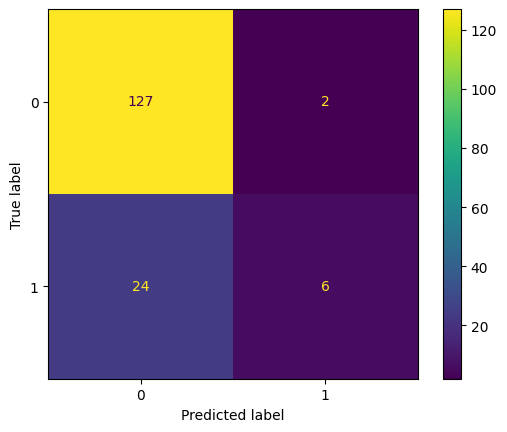

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
plt.rc('font', size=10)
disp.plot()

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt



# Visualize individual trees within the Random Forest
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # Adjust nrows and ncols based on the number of trees to visualize

for i in range(6):  # Change the range to visualize different trees within the forest
    plot_tree(rf_classifier.estimators_[i], ax=axes[i], filled=True, rounded=True, class_names=['Neg', 'WNS'], feature_names=[f'Feature {i}' for i in range(X.shape[1])])
    axes[i].set_title(f'Tree {i+1}')

plt.tight_layout()
plt.show()

IndexError: ignored

Error in callback <function flush_figures at 0x7c228ebe12d0> (for post_execute):


KeyboardInterrupt: ignored

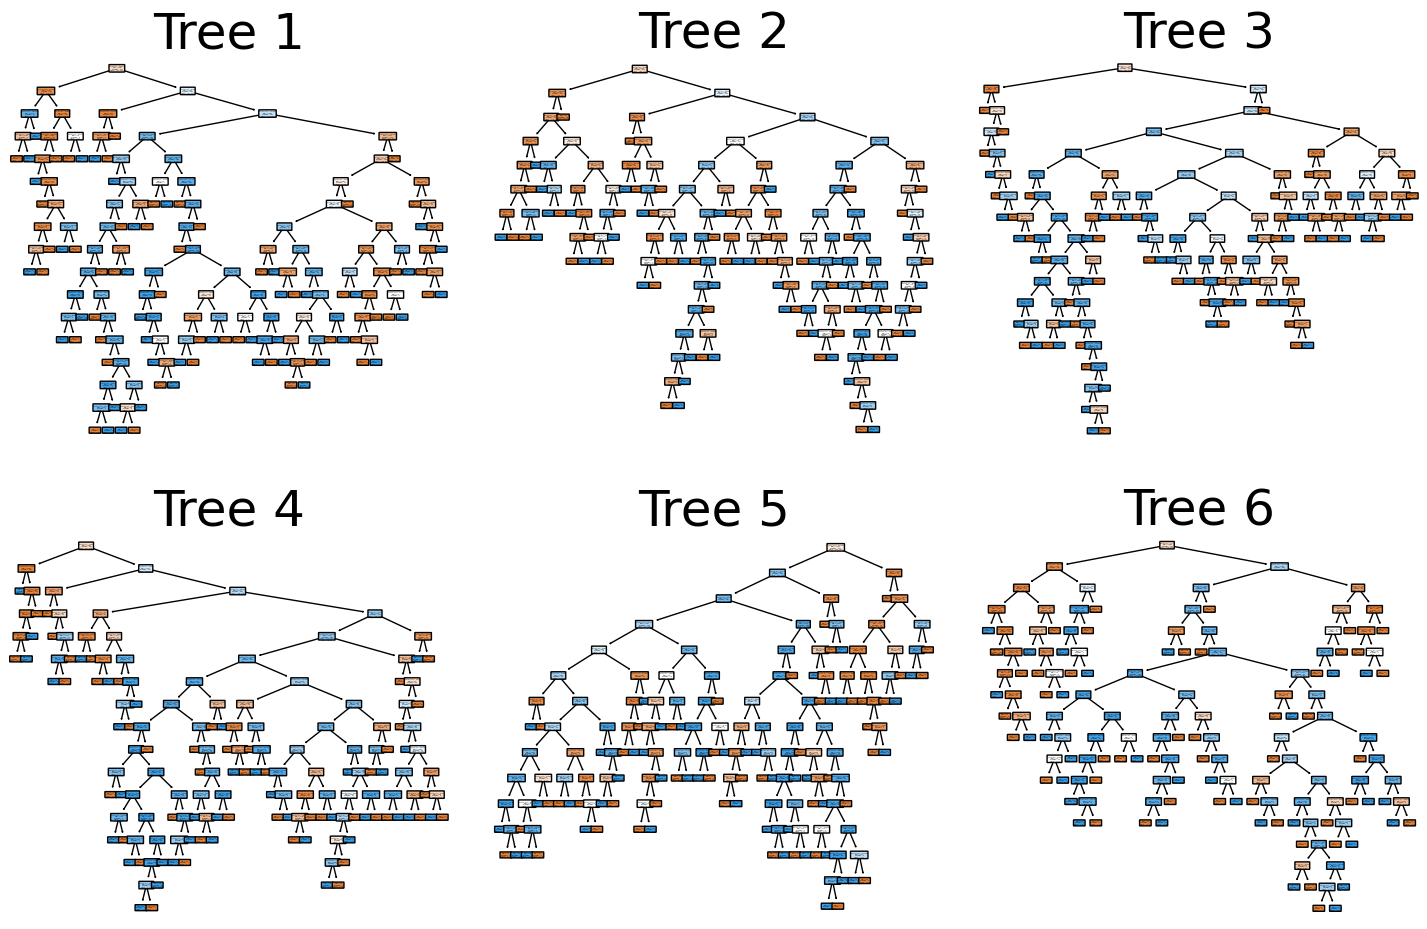

In [49]:

# Visualize individual trees within the Random Forest arranged in a grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Create a 2x3 grid for visualization

for i, ax in enumerate(axes.flatten()):
    if i < 6:  # Visualize only the first 6 trees
        plot_tree(rf_classifier.estimators_[i], ax=ax, filled=True, rounded=True, class_names=['Class 0', 'Class 1'], feature_names=[f'Feature {i}' for i in range(X.shape[1])])
        ax.set_title(f'Tree {i+1}')

plt.tight_layout()
plt.show()

In [14]:
# Convert DataFrame to xarray Dataset
ds = xr.Dataset.from_dataframe(df.set_index(['lat', 'lon','year']))

print(ds)

<xarray.Dataset>
Dimensions:                   (lat: 98, lon: 214, year: 18)
Coordinates:
  * lat                       (lat) float64 24.62 24.88 25.12 ... 49.12 49.38
  * lon                       (lon) float64 -123.9 -123.6 ... -67.38 -67.12
  * year                      (year) int64 2006 2007 2008 ... 2021 2022 2023
Data variables: (12/13)
    maxHuss                   (lat, lon, year) float32 nan nan nan ... nan nan
    maxPrec                   (lat, lon, year) float32 nan nan nan ... nan nan
    maxTemp                   (lat, lon, year) float32 nan nan nan ... nan nan
    meanHuss                  (lat, lon, year) float32 nan nan nan ... nan nan
    meanPrec                  (lat, lon, year) float32 nan nan nan ... nan nan
    meanRsds                  (lat, lon, year) float32 nan nan nan ... nan nan
    ...                        ...
    minHuss                   (lat, lon, year) float32 nan nan nan ... nan nan
    minPrec                   (lat, lon, year) float32 nan nan nan 